In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
print(tf.__version__)

2.13.0


In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [ ]:
#fashion_mnist

In [ ]:
#train_images[0]

In [3]:
#28*28 np arrays with 0 to 255 pixel range , with the original label ranges from 0 to 9 , thus needed to be defined manually
#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
#data exploration limites scope
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [125]:
#train_images[0]

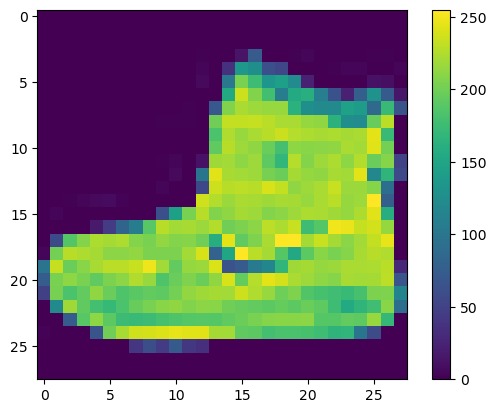

In [10]:
#EDA on the data
plt.figure()
plt.imshow(train_images[0],cmap='viridis')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#plt.imshow(train_images[0])

In [11]:
train_images=train_images/255.0
test_images=test_images/255.0

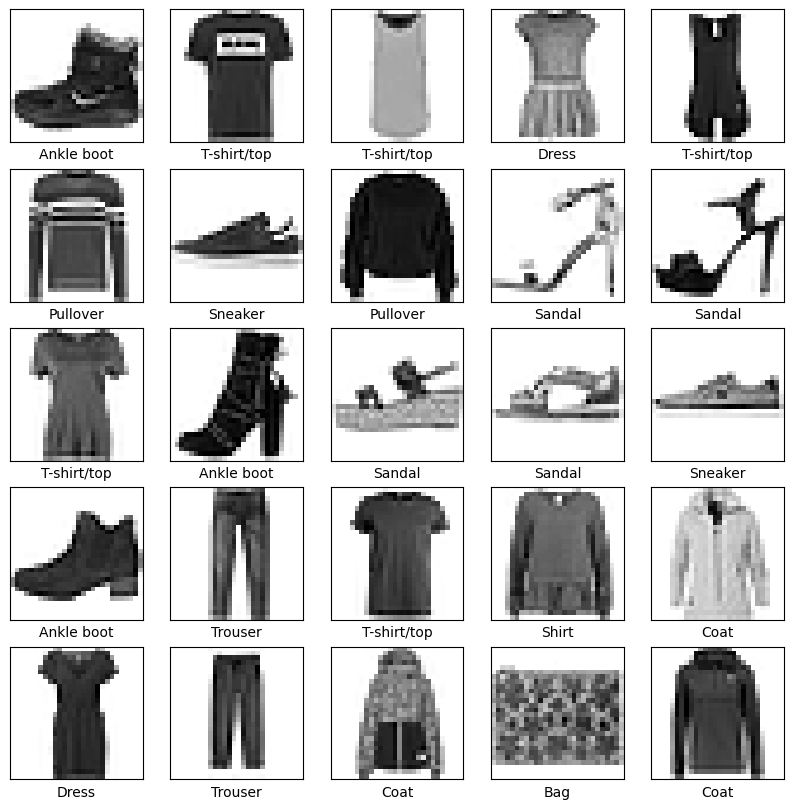

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
#Building the basic neural network model
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)  # 10 classes returned as given in the data
])

In [15]:
# Now define the model comilaltion parameters like loss func, to evaluate the accuracy , you want to minimize this finction optimizer- 
# to update the weights based on the loss function metrics to to determine the corectly classified images

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [16]:
#Now train the model by fitting it with train_images and train_labels
model.fit(train_images,train_labels,epochs=20)

# Old script
#model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, verbose=2)


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5036 - accuracy: 0.8255
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8651
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.8784
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3144 - accuracy: 0.8860
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.8923
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8954
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2701 - accuracy: 0.8987
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2601 - accuracy: 0.9033
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2481 - accuracy: 0.9065
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [17]:
#Now test the model in the test labels test images
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("\nTest-accuracy: ",test_acc)

313/313 - 1s - loss: 0.3605 - accuracy: 0.8898 - 604ms/epoch - 2ms/step

Test-accuracy:  0.8898000121116638


In [18]:
#a gap between the train and test acuuracies
Probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [19]:
predictions=Probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
#predictions[0]

In [20]:
#get the max to get the true label of the the test images
np.argmax(predictions[0])

9

In [21]:
#First test image is 9- ankle boot
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
#plt.imshow(train_images[13])

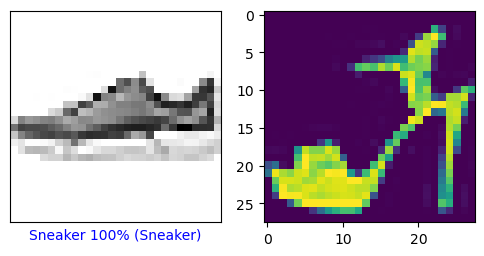

In [83]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
plt.imshow(train_images[i])
plt.show()

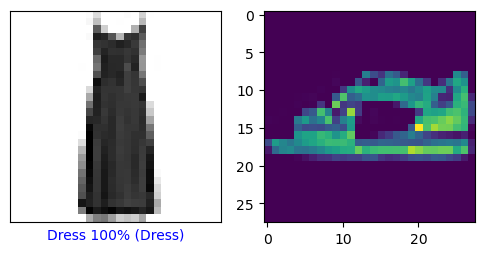

In [23]:
#red- incorrect and bue- correct label
i = 13
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
plt.imshow(train_images[i])
plt.show()

In [140]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

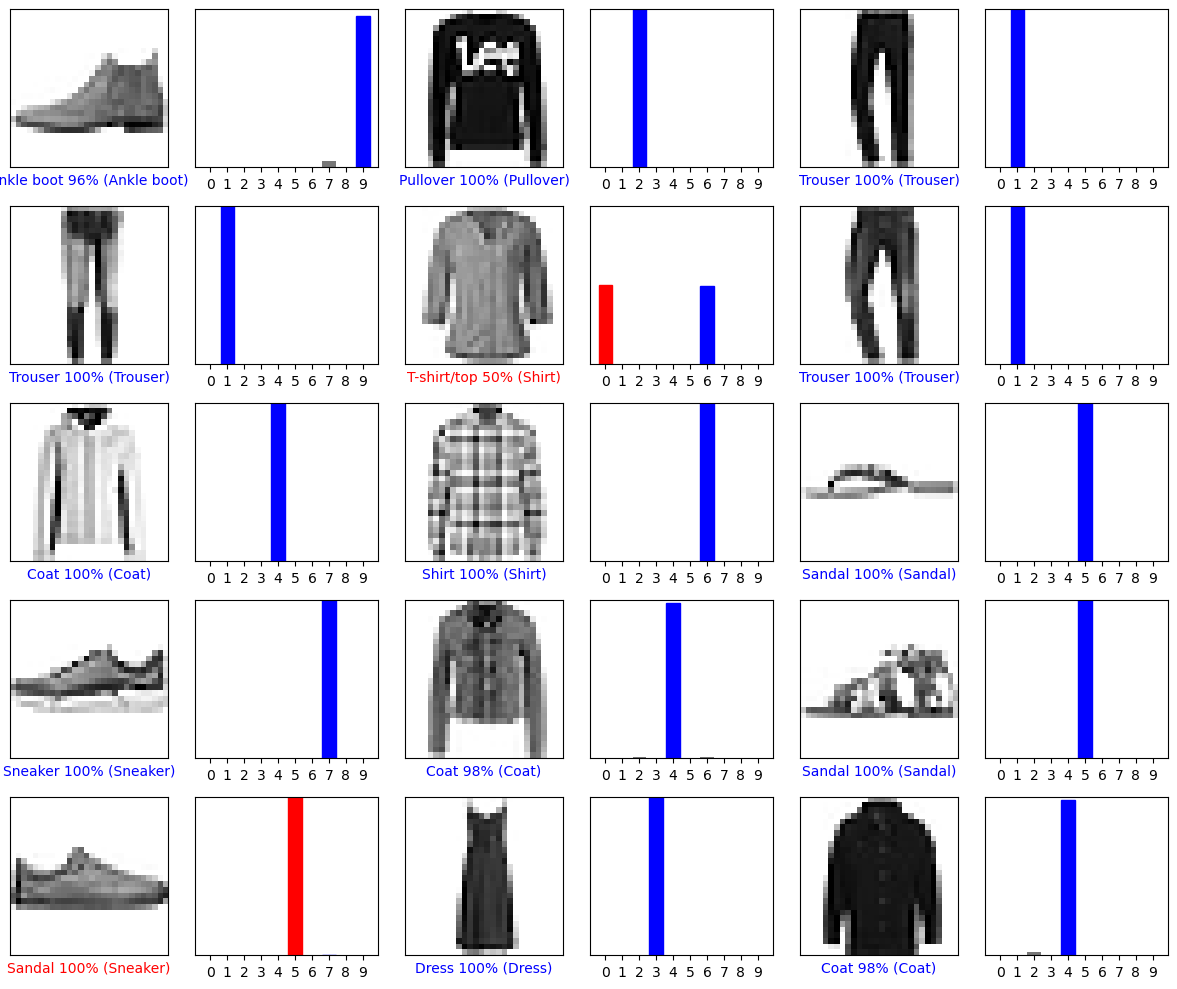

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

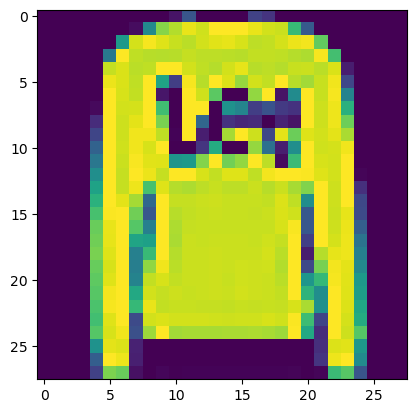

In [25]:
plt.imshow(test_images[1])

In [30]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [31]:
#batch of the images can be predicted so add this to list in this case only one image is there
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = Probability_model.predict(img)
#print(predictions_single)

1/1 [==============================] - 0s 48ms/step


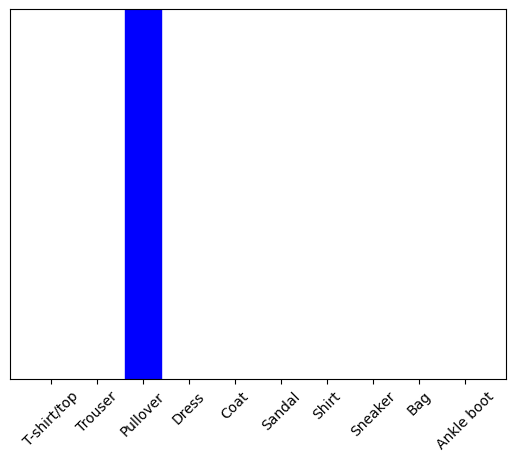

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [37]:
#np.argmax(predictions_single[0])

In [105]:
#plot_value_array(1, predictions_single3[0], test_labels)
#_ = plt.xticks(range(10), class_names, rotation=45)
#1plt.show()

In [130]:
#i = 0
#plt.figure(figsize=(6,3))
#plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
#plt.imshow(train_images[2])
#plt.show()

In [ ]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [77]:
model.save('fashion_model.keras')

In [78]:
from keras.models import load_model

In [79]:
pretrained_model = load_model('fashion_model.keras')

In [80]:
print(pretrained_model)

In [108]:
from PIL import Image
import numpy as np

# Load and preprocess the image
image = Image.open('C:\\Users\\pmala\\Downloads\\keras\\testSample\\img_12.jpg')
image_array = np.array(image)
image = image_array /255.0
image=image.reshape(28,28)

#image=Image.open('C:\\Users\\pmala\\Downloads\\test1\\00086_78.png')
#image_array = np.array(image)
#image = np.random.rand(196608)
#image = image_array.reshape((196608, 28, 28))



#train_images=train_images/255.0
#test_images=test_images/255.0

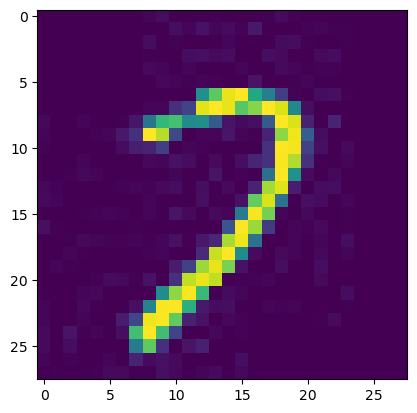

In [131]:
plt.imshow(test_img[0])

In [109]:
test_img = image
print(test_img.shape)

(28, 28)


In [110]:
test_img = (np.expand_dims(test_img,0))
print(test_img.shape)

(1, 28, 28)


In [132]:
predictions_single = Probability_model.predict(test_img)

1/1 [==============================] - 0s 58ms/step


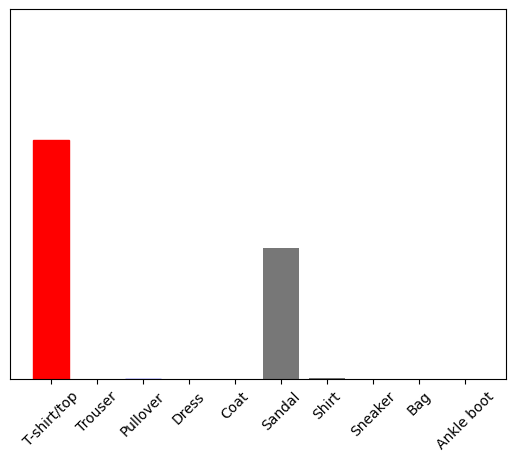

In [133]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [134]:
predict=pretrained_model.predict(test_img)

1/1 [==============================] - 0s 50ms/step


In [135]:
predicted_label=np.argmax(predict)

In [139]:
predicted = np.argmax(predict, axis=1)
predicted

array([0], dtype=int64)

In [137]:
print(f"Predicted: {predicted}")

Predicted: [0]


In [146]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [152]:
import cv2
#from keras.applications import VGG16
# Load and preprocess the image
#image1 = cv2.imread('C:\\Users\\pmala\\Downloads\\test1\\Sl500.png')
image1 = cv2.imread('C:\\Users\\pmala\\Downloads\\test1\\Sl500.png')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

ValueError: cannot reshape array of size 2352 into shape (28,28)